core           INFO 	Loading data for Hungarian Grand Prix - Qualifying [v3.0.6]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data h

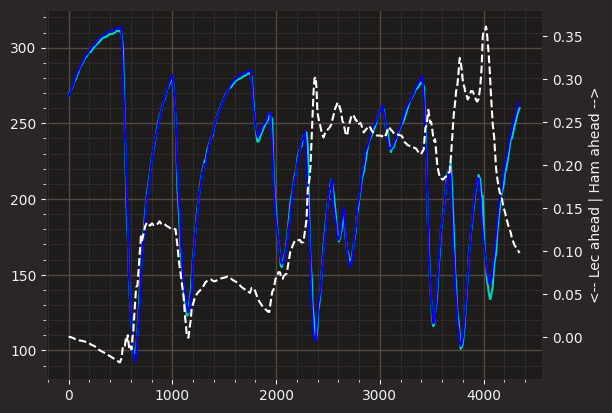

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

plotting.setup_mpl()

session = ff1.get_session(2023, 'Hungarian', 'Q')
session.load()
lec = session.laps.pick_driver('VER').pick_fastest()
ham = session.laps.pick_driver('HAM').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ham, lec)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(ham['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(lec['Team']))

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Ver ahead | Ham ahead -->")
plt.show()